<a href="https://colab.research.google.com/github/priyankashinde-DS/Rossmann_sales_prediction/blob/main/ML(Supervised)_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.Data importing**

#**2.Visualization and EDA (Exploratory Data Analysis)**

# **3.Bivariate Analysis**

# **4.Feature Engineering**

# **5.Model Build**

# **6.Model Evaluation**

# **7.Conclusion**



# **Data importing**

In [96]:
# load rossmann store dataset using pandas library
rossmann_store_sale= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/Supervised ML - Regression/Data & Resources/Rossmann Stores Data.csv')

# load store dataset using pandas library
store_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/Supervised ML - Regression/Data & Resources/store.csv')

# **Exploratory Data Analysis(EDA)**

In [97]:
# lets take few rows of 1st dataset
rossmann_store_sale.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [98]:
# lets take look at store data
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**We can see that all the two datset rossmann_store_sale and store_data have the common row of store.This column of data would be useful for us to concanate the data in future.**

In [99]:
# check dataset shape and column names for both dataset
print(rossmann_store_sale.shape)
print(rossmann_store_sale.columns.to_list()) 

print(store_data.shape)
print(store_data.columns.to_list())

(1017209, 9)
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
(1115, 10)
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [100]:
# merge sales and store datasets
store_sale_data = pd.merge(rossmann_store_sale, store_data, how = 'inner', on = 'Store')

In [101]:
# check few rows
store_sale_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [102]:
# some last rows
store_sale_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [103]:
#Data Dimension
print( 'Number of Rows: {}'.format( store_sale_data.shape[0] ) )
print( 'Number of Columns: {}'.format( store_sale_data.shape[1] ) )

Number of Rows: 1017209
Number of Columns: 18


**We have more than 10 lac rows of data in train dataset.So this is quite large dataset.**

In [104]:
# Total feature in dataset 
store_sale_data.columns.to_list()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [105]:
#Data Types
store_sale_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**This dataset having two types of data: i)Numerical  ii)Categorical**

                                              
                                               

In [106]:
#Descriptive Statistics
store_sale_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0


In [107]:
#Check NAN values
store_sale_data.isnull().sum().to_frame().rename(columns={0:'Missing values count'})

,Missing values count
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


 **Due to the high number of missing values, the traditional methods could not be so good because if we drop or input the mean we could lose information.**


---

**competition_distance: maybe null values indicates that there're no competitors next.**

 **promo2_since_week and promo2_since_year: if there are missing values in these columns, maybe it's because the store is not participating in promo2.**

In [108]:
#check Duplicates value
store_sale_data[store_sale_data.duplicated()].count().to_frame().rename(columns={0:'Duplicate values count'})

,Duplicate values count
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


 **Dataset does not have any duplicate values**

## **Univariate Analysis**



In [109]:
# Dependent/target Variable 
store_sale_data['Sales'].describe().apply(lambda x:format(x,'.2f')).to_frame()

,Sales
count,1017209.00
mean,5773.82
std,3849.93
min,0.00
25%,3727.00
50%,5744.00
75%,7856.00
max,41551.00


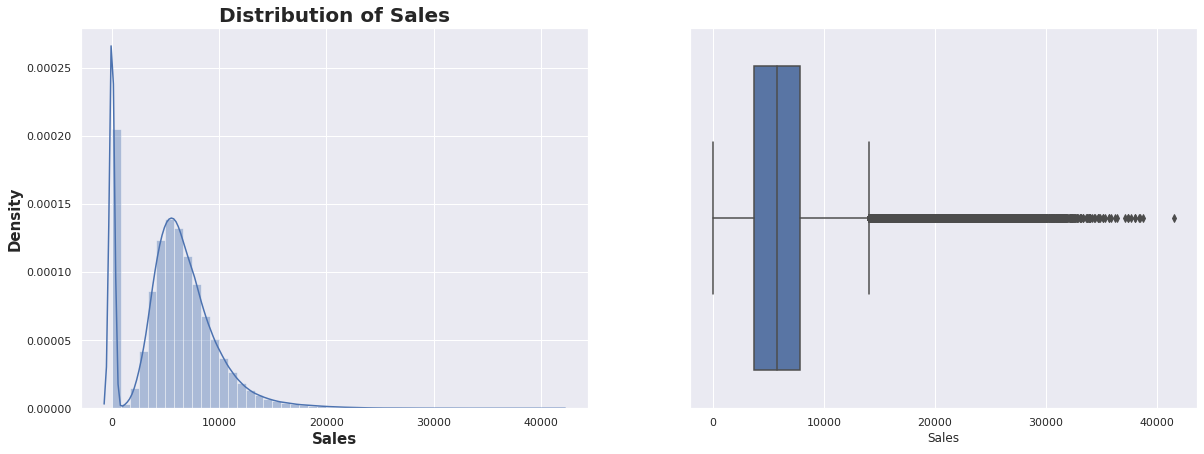

In [110]:
#distribution for sales variable
sns.set(style='darkgrid')
plt.figure( figsize = (20,7))
plt.subplot(121)
ax = sns.distplot(store_sale_data['Sales'], kde = True)
ax.set_xlabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Density',size=15,fontdict={"weight": "bold"})
ax.set_title("Distribution of Sales",fontsize=20,fontdict={"weight": "bold"})

plt.subplot(122)
sns.boxplot(store_sale_data['Sales'])

**The graph of sales distribution shows a positively skewed distribution, and some data falls below 0 because some stores are closed.**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f442fca22d0>,
      dtype=object)

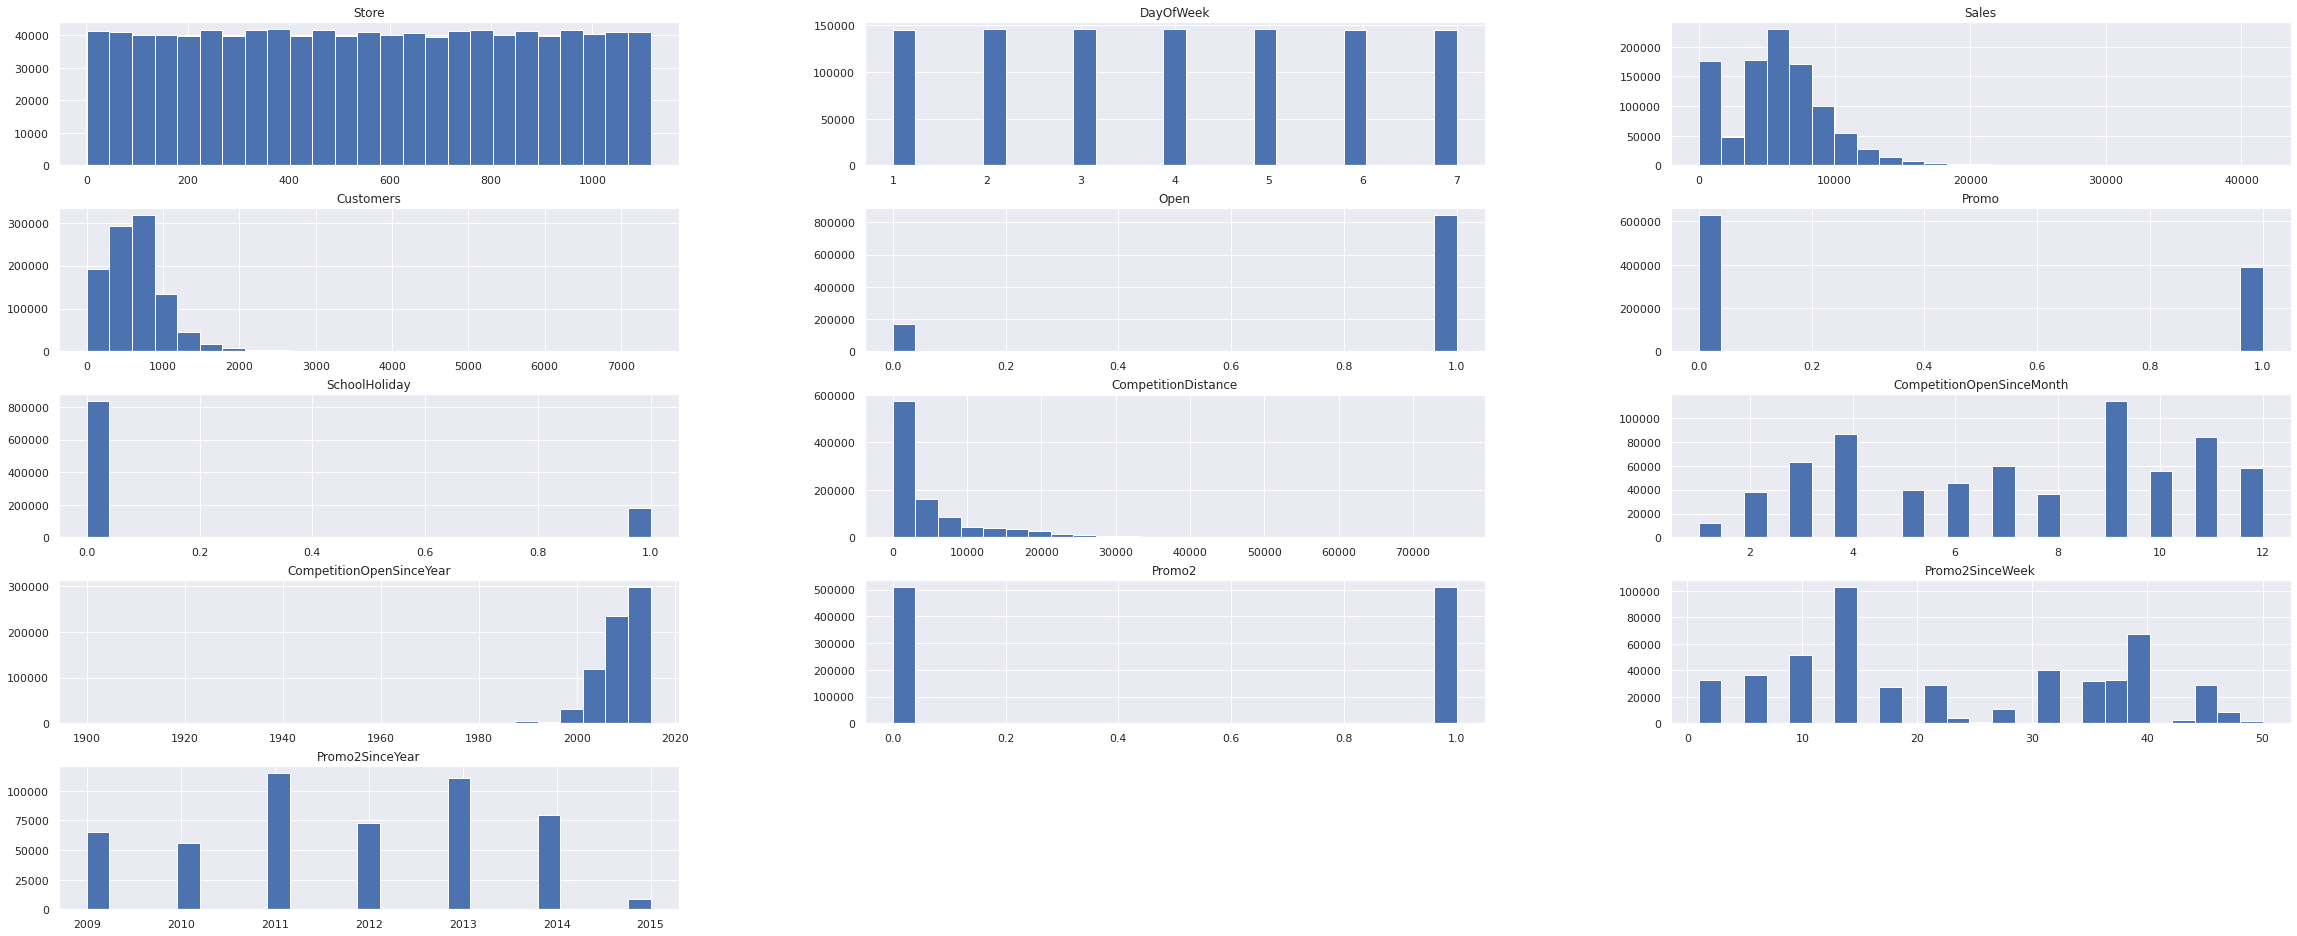

In [111]:
# select numerical variables
num_feature = store_sale_data.select_dtypes( include = ['int64', 'float64'])

num_feature.hist(bins = 25, figsize = (40,30), layout = (9,3))

**On looking at the graph above the numerical variables, it is clear that the day_of_week feature does not have variations, as the stores sold the same quantity every day.**


---


**Additionally, a feature called is_promo provided information about sales of products that were not on sale, which is an insight for the business.**


---



**competition Since month:-We see that there where many value which has zero in it. The competition was more in the month of april and september**


---



**Competition open since year :- We see that there where many value which has zero in it. The competition was more during the years 2012 -2014 and we observe that there where less competition before 2006.**


---




In [112]:
# select categorical variables
cat_feat = store_sale_data.select_dtypes(exclude = ['float64','int64'])
cat_feat.columns

Index(['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [113]:
store_sale_data['Date'].min(),store_sale_data['Date'].max()

('2013-01-01', '2015-07-31')

 **Datset having 2.5 year Rossmann Store Sales data information**

In [114]:
# create year column from date column
store_sale_data['Year'] =  pd.DatetimeIndex(store_sale_data['Date']).year

# create month column from date column
store_sale_data['Month'] =  pd.DatetimeIndex(store_sale_data['Date']).month

# create week column from date column
store_sale_data['Weekofyear'] =  pd.DatetimeIndex(store_sale_data['Date']).week

# create day column from date column
store_sale_data['Day'] = pd.DatetimeIndex(store_sale_data['Date']).day


**In Date column using DatetimeIndex function extract other features year, month and weekofyear  from Date.**

In [115]:
# check state holiday type
store_sale_data.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [116]:
# replace 0 with string 0 because both are same
store_sale_data.StateHoliday = store_sale_data.StateHoliday.replace(0,'0')

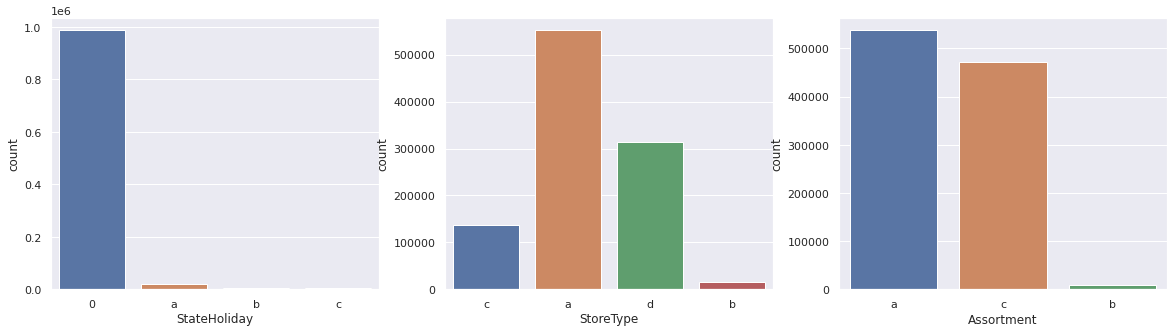

In [117]:
# state_holiday
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(store_sale_data['StateHoliday'])

# store_type
plt.subplot(1,3,2)
sns.countplot(store_sale_data['StoreType'])

# assortment
plt.subplot(1,3,3)
sns.countplot(store_sale_data['Assortment'])

**1.Taking a look at the categorical variables, we can see that state_holiday has  three holidays in this data set :-**

1.   **a = public holiday**
2.   **b = Easter holiday**
3.   **c = Christmas**

**Majority of Stores are closed on state holidays.**

---
**2.In the variable store_type, there are four different types of stores i.e( a, b, c, d)**


---



**3.In the assortment, there are three different categories.**


1.    **a = basic**
2.   **b = extra**
3.    **c = extended**

---

